In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'

## Remineralization 
datadir_remin = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_remin = 'ocean_cobalt_omip_rates_year_z.0846-0850.remoc.nc'

##Primary production

datadir_pp = 'ocean_cobalt_omip_rates_year_z/ts/annual/5yr/'
filename_pp = 'ocean_cobalt_omip_rates_year_z.0846-0850.pp.nc'

##Phytoplankton 

datadir_phyc = 'ocean_cobalt_omip_tracers_year_z/ts/annual/5yr/'
filename_phyc = 'ocean_cobalt_omip_tracers_year_z.0846-0850.phyc.nc'

## Volume and temperature

filename_vol = 'ocean_cobalt_omip_rates_year_z.0846-0850.volcello.nc'

datadir_temp = 'ocean_annual_z/ts/annual/5yr/'
filename_temp = 'ocean_annual_z.0846-0850.thetao.nc'


In [3]:
remin = xr.open_dataset(rootdir+datadir_remin+filename_remin)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [4]:
#pp = xr.open_dataset(rootdir+datadir_pp+filename_pp)
#phyc = xr.open_dataset(rootdir+datadir_phyc+filename_phyc)
#vol = xr.open_dataset(rootdir+datadir_pp+filename_vol)
temp = xr.open_dataset(rootdir+datadir_temp+filename_temp)


In [9]:
de = xr.merge([remin, pp, phyc, vol, temp])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/pyt

In [10]:
remin_mol = de.remoc * de.volcello
remin_mol.name = 'remin_mol'
de = xr.merge([de, remin_mol])

pp_mol = de.pp * de.volcello
pp_mol.name = 'pp_mol'
de = xr.merge([de, pp_mol])

phyc_mol = de.phyc * de.volcello
phyc_mol.name = 'phyc_mol'
de = xr.merge([de, phyc_mol])

In [15]:
de

<xarray.Dataset>
Dimensions:     (nv: 2, time: 5, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0846-07-02 12:00:00 ... 0850-07-02 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] 365 days 365 days ... 365 days 365 days
    average_T1  (time) object 0845-06-04 00:00:00 ... 0849-06-03 00:00:00
    average_T2  (time) object 0846-06-04 00:00:00 ... 0850-06-03 00:00:00
    remoc       (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object 0846-01-01 00:00:00 ... 0851-01-01 00:00:00
    pp          (time, z_l, yh, xh) float32 ...
    phyc        (time, z_l, yh, xh) float32 ...
    vol

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


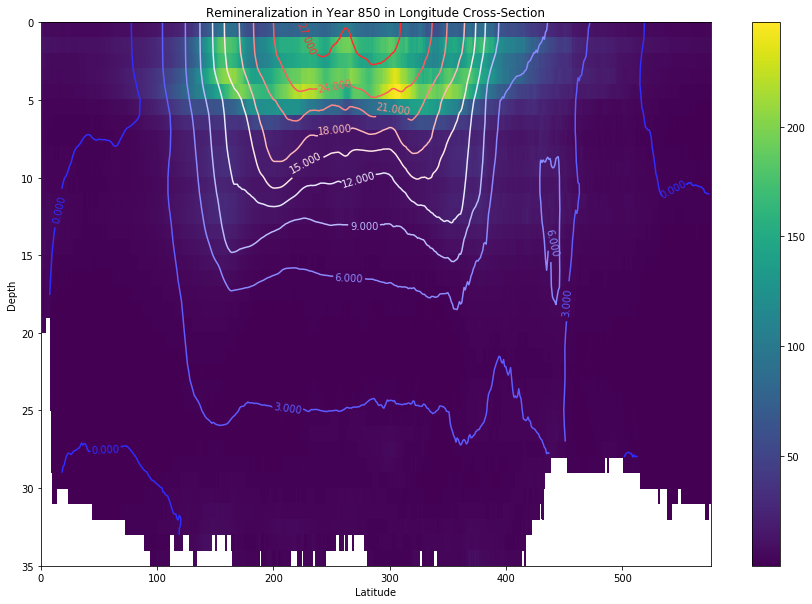

In [11]:
##Remineralization!!!

#Remember that units are moles per second!

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        remin_in_theta = np.nanmean(de.remin_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(de.thetao.isel(time = 4, z_l =j, yh = k))
        crosslong[j][k] = remin_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Remineralization in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
#colorbar.set_label('Rate of Remineralization (moles per second)', rotation=270)
plt.show()

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


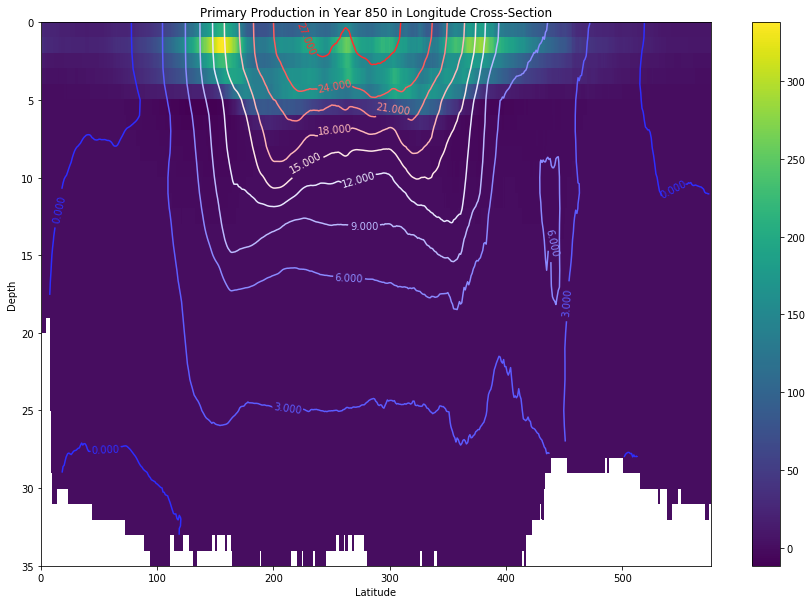

In [14]:
## Primary Production!!

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        pp_in_theta = np.nanmean(de.pp_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(de.thetao.isel(time = 4, z_l =j, yh = k))
        crosslong[j][k] = pp_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Primary Production in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
#colorbar.set_label('Rate of Primary Production (moles per second)', rotation=270)
plt.show()

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


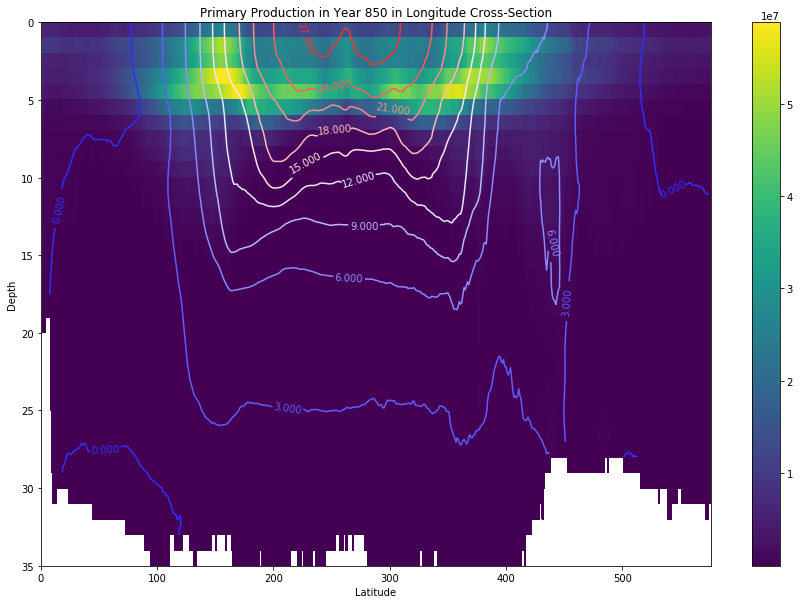

In [14]:
## Phytoplankton!! 

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        phyc_in_theta = np.nanmean(de.phyc_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(temp.thetao.isel(time = 4, z_l =j, yh = k))
        crosslong[j][k] = phyc_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
#plt.colorbar(im)
#plt.title('Primary Production in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
#colorbar.set_label('Rate of Primary Production (moles per second)', rotation=270)
plt.show()

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


AttributeError: 'Text' object has no property 'labels'

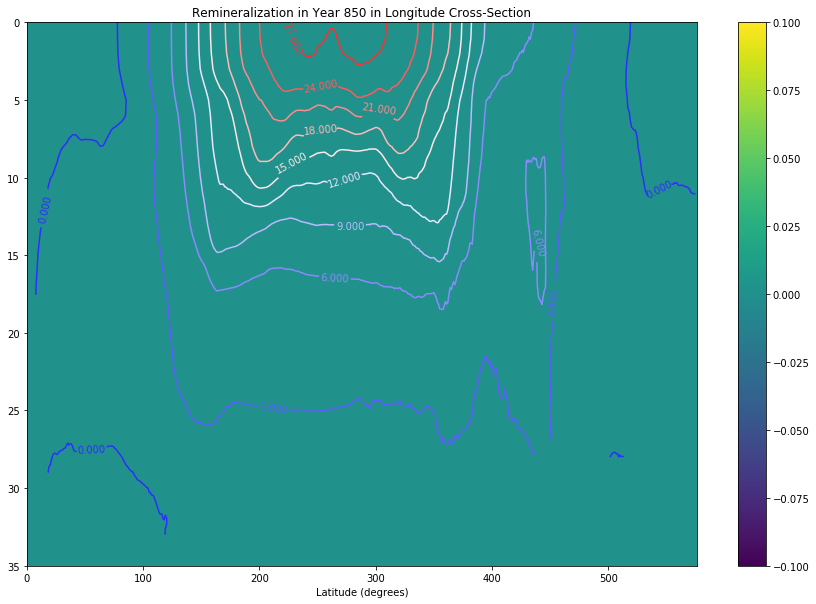

In [7]:
xlabel = np.arange(-79,99,20)
ylabel = np.arange(-1,6.5e3,800)

crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        #remin_in_theta = np.nanmean(de.remin_mol.isel(time = 4, z_l = j, yh = k))
        avgtemp = np.nanmean(temp.thetao.isel(time = 4, z_l =j, yh = k))
        #crosslong[j][k] = remin_in_theta
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Remineralization in Year 850 in Longitude Cross-Section')
plt.xlabel('Latitude (degrees)', labels=xlabel)
plt.ylabel('Depth (meters)', labels=ylabel)
#colorbar.set_label('Rate of Remineralization (moles per second)', rotation=270)
plt.show()